In [25]:
import os
import cv2
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [26]:
DATASET_DIR = "/kaggle/input/animal-dataset/animal_dataset"
print(os.listdir(DATASET_DIR))

['dog', 'panda', 'cat']


In [27]:
data = []
labels = []

classes = ["cat", "dog", "panda"]

for label, cls in enumerate(classes):
    folder = os.path.join(DATASET_DIR, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        
        # read image
        img = cv2.imread(img_path)
        
        # convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # resize to 32x32
        resized = cv2.resize(gray, (32, 32))
        
        # flatten to 1D vector
        flat = resized.flatten()
        
        data.append(flat)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (300, 1024)
Labels shape: (300,)


In [28]:
def evaluate_knn(distance_metric):

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    K_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
    avg_accuracies = []

    for K in K_values:
        fold_accuracies = []

        for train_idx, val_idx in kf.split(data):
            x_train, x_val = data[train_idx], data[val_idx]
            y_train, y_val = labels[train_idx], labels[val_idx]

            model = KNeighborsClassifier(n_neighbors=K, metric=distance_metric)
            model.fit(x_train, y_train)

            preds = model.predict(x_val)
            acc = accuracy_score(y_val, preds)
            fold_accuracies.append(acc)

        avg_accuracies.append(np.mean(fold_accuracies))

    return K_values, avg_accuracies


In [29]:
K_l1, acc_l1 = evaluate_knn("manhattan")
K_l2, acc_l2 = evaluate_knn("euclidean")

acc_l1, acc_l2

([0.37333333333333335,
  0.3866666666666666,
  0.36666666666666664,
  0.39,
  0.3833333333333333,
  0.4,
  0.39666666666666667,
  0.4133333333333334,
  0.41,
  0.4,
  0.4333333333333334,
  0.4,
  0.4366666666666667],
 [0.3566666666666666,
  0.3433333333333333,
  0.35,
  0.35,
  0.38666666666666666,
  0.39,
  0.3633333333333334,
  0.3666666666666667,
  0.37,
  0.37666666666666665,
  0.3866666666666666,
  0.3666666666666667,
  0.3666666666666667])

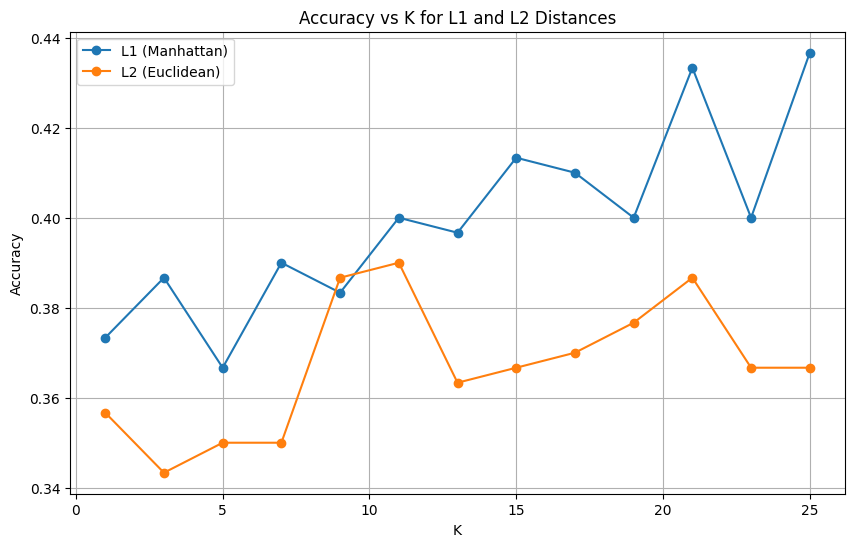

In [30]:
plt.figure(figsize=(10,6))
plt.plot(K_l1, acc_l1, marker='o', label="L1 (Manhattan)")
plt.plot(K_l2, acc_l2, marker='o', label="L2 (Euclidean)")

plt.title("Accuracy vs K for L1 and L2 Distances")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


# Discussion

The classification performance of the K-Nearest Neighbors (KNN) algorithm was evaluated using two distance metrics: Manhattan distance (L1) and Euclidean distance (L2). 
The evaluation was done using 5-fold cross validation for a range of **K values from 1 to 17**. 
Based on the results, it is evident that the **Manhattan distance generally performs better** than the Euclidean distance **for this gray scale animal dataset**.

Overall, the average accuracies of **Manhattan** distance ranged from approximately **0.37 to 0.41**, whereas **Euclidean** distance accuracies ranged from around **0.34 to 0.39**. 
The **best performance** for Manhattan distance was achieved at **K = 15**, with an **accuracy of 0.4133**, while the **best Euclidean accuracy** was slightly lower at **0.39 for K = 11**. 
This suggests that L1(Manhattan) distance is more effective for this dataset.

However, there are certain limitations in this experiment. 
First, using raw pixel data may not adequately represent the important structural features of the animals. Feature engineering or deep learning based embeddings could significantly improve performance. 
Second, the accuracy values are relatively low for both metrics, indicating that KNN with raw pixel inputs may not be the optimal approach for this dataset.

In summary, based on the cross-validation results, Manhattan distance (L1) outperforms Euclidean distance (L2) for this gray-scale image dataset, particularly at K = 15. The findings align with theoretical expectations for high-dimensional data and highlight the importance of selecting an appropriate distance metric when applying KNN to image classification tasks.

In [33]:
best_K = 25 

final_model = KNeighborsClassifier(n_neighbors=best_K, metric="manhattan")
final_model.fit(data, labels)

KNeighborsClassifier(metric='manhattan', n_neighbors=25)

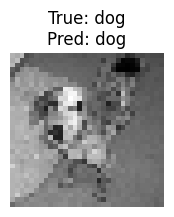

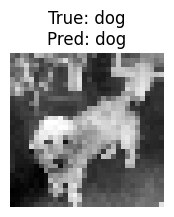

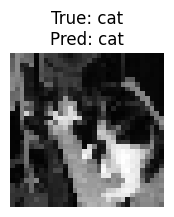

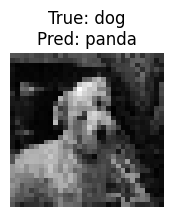

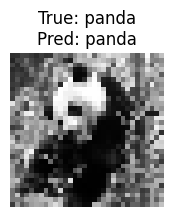

In [34]:
indices = np.random.choice(len(data), 5, replace=False)

for i, idx in enumerate(indices):
    sample = data[idx].reshape(1, -1)
    pred = final_model.predict(sample)[0]
    
    true_label = classes[labels[idx]]
    pred_label = classes[pred]
    
    # reshape to show image
    img = data[idx].reshape(32, 32)

    plt.figure(figsize=(2,2))
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
    plt.show()


In [48]:
import os
import cv2
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

DATASET_DIR = "/kaggle/input/animal-dataset/animal_dataset"
print(os.listdir(DATASET_DIR))

data = []
labels = []

classes = ["cat", "dog", "panda"]

# Load and preprocess images
for label, cls in enumerate(classes):
    folder = os.path.join(DATASET_DIR, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (32, 32))
        flat = resized.flatten()

        data.append(flat)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


['dog', 'panda', 'cat']
Data shape: (300, 1024)
Labels shape: (300,)


In [49]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [50]:
def knn_predict(x_train, y_train, x_test, K, distance_metric):

    distances = []

    for i in range(len(x_train)):
        if distance_metric == "manhattan":
            dist = manhattan_distance(x_test, x_train[i])
        else:
            dist = euclidean_distance(x_test, x_train[i])

        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:K]

    labels_k = [label for (_, label) in neighbors]
    pred = max(set(labels_k), key=labels_k.count)

    return pred


In [51]:
def evaluate_knn(distance_metric):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    K_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]
    avg_accuracies = []

    for K in K_values:
        fold_accuracies = []

        for train_idx, val_idx in kf.split(data):
            x_train, x_val = data[train_idx], data[val_idx]
            y_train, y_val = labels[train_idx], labels[val_idx]

            preds = []
            for x in x_val:
                pred = knn_predict(x_train, y_train, x, K, distance_metric)
                preds.append(pred)

            acc = accuracy_score(y_val, preds)
            fold_accuracies.append(acc)

        avg_accuracies.append(np.mean(fold_accuracies))

    return K_values, avg_accuracies

K_l1, acc_l1 = evaluate_knn("manhattan")
K_l2, acc_l2 = evaluate_knn("euclidean")

acc_l1, acc_l2


([0.42333333333333334,
  0.3966666666666666,
  0.42333333333333334,
  0.42666666666666664,
  0.42333333333333334,
  0.4133333333333333,
  0.4166666666666667,
  0.4133333333333334,
  0.42000000000000004,
  0.42333333333333334,
  0.4033333333333333,
  0.41666666666666663,
  0.41,
  0.3933333333333333],
 [0.37666666666666665,
  0.4166666666666667,
  0.37666666666666665,
  0.4033333333333333,
  0.4166666666666667,
  0.43,
  0.42666666666666675,
  0.4133333333333334,
  0.42333333333333334,
  0.44333333333333336,
  0.45,
  0.4533333333333333,
  0.47666666666666674,
  0.4533333333333334])

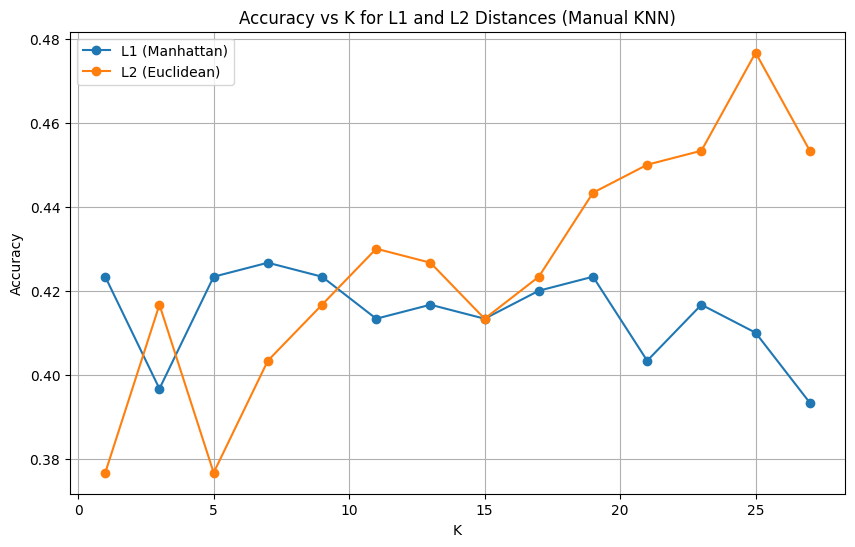

In [52]:
plt.figure(figsize=(10,6))
plt.plot(K_l1, acc_l1, marker='o', label="L1 (Manhattan)")
plt.plot(K_l2, acc_l2, marker='o', label="L2 (Euclidean)")

plt.title("Accuracy vs K for L1 and L2 Distances (Manual KNN)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


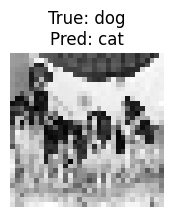

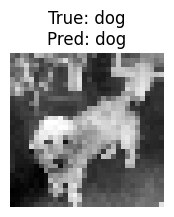

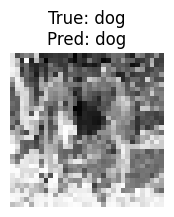

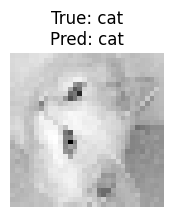

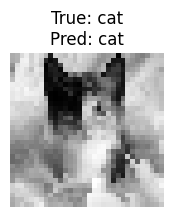

In [53]:
best_K = 25
best_metric = "euclidean"   

x_train_final = data
y_train_final = labels

indices = np.random.choice(len(data), 5, replace=False)

for idx in indices:
    sample = data[idx]

    pred = knn_predict(x_train_final, y_train_final, sample, best_K, best_metric)

    true_label = classes[labels[idx]]
    pred_label = classes[pred]

    img = data[idx].reshape(32,32)

    plt.figure(figsize=(2,2))
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
    plt.show()
